In [2]:
# We'll need numpy for some mathematical operations
import numpy as np

# Librosa for audio
import librosa, librosa.display
import matplotlib.pyplot as plt
import pandas as pd

import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd

data, fs = librosa.load('bdbn.wav', None)
ipd.Audio(data, rate=fs)

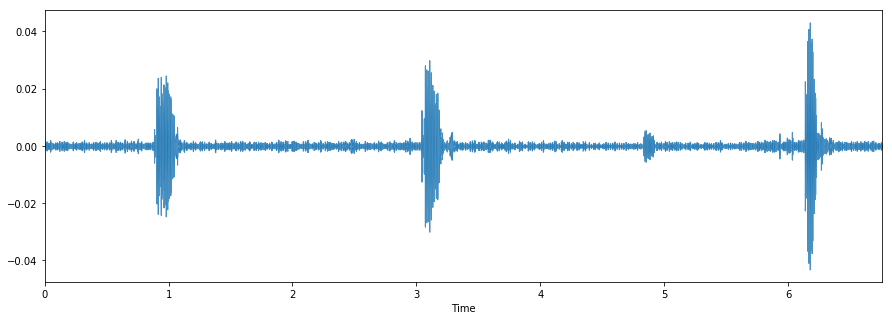

In [4]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, fs, alpha=0.8)


Text(0.5,0,'Frequency (Hz)')

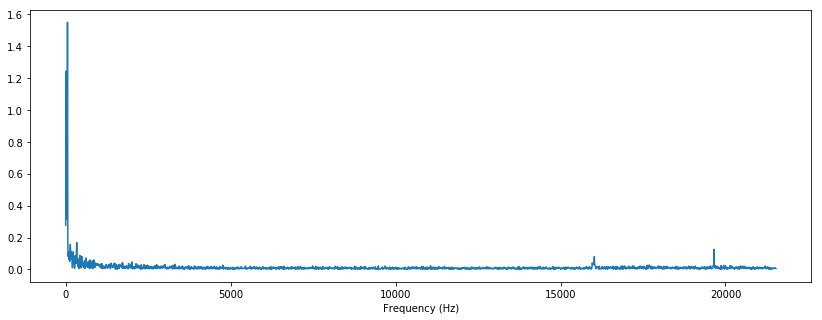

In [5]:
X = scipy.fft(data[10000:14096])
X_mag = numpy.absolute(X)
f = numpy.linspace(0, fs, 4096)  # frequency variable
plt.figure(figsize=(14, 5))
plt.plot(f[:2000], X_mag[:2000]) # magnitude spectrum
plt.xlabel('Frequency (Hz)')

In [6]:
data

array([ 0.00073242,  0.00057983,  0.00048828, ..., -0.00186157,
       -0.00158691, -0.00170898], dtype=float32)

In [7]:
len(data)

297984

In [8]:
data[45025]

0.0057373047

In [9]:
data[0]

0.0007324219

In [10]:
fs

44100

In [21]:
valor1 = True;
valor2 = True;

x = 0;

while valor2:
    vector = np.absolute(data[x:(x+1000)])
    if valor1 == True:
        filtro = list(filter(lambda x: x > 0.005, vector))
        if filtro:
            valor1 = False
            print (x+200)
    else:
        filtro = list(filter(lambda x: x > 0.005, vector))
        if not filtro:
            valor2 = False
            print (x)
            
    x = x+20
    
print('Out of loop')
    
    

38180
46000
Out of loop


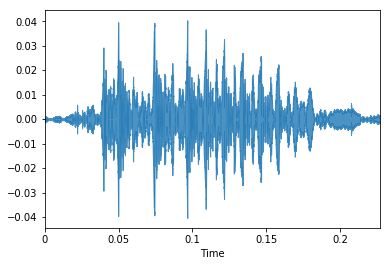

In [17]:
librosa.display.waveplot(data[38000:48000], fs, alpha=0.8)


In [20]:
ipd.Audio(data[38000:48000], rate=fs)

In [211]:
frame_lenght = 3150 # frames de fs/14 aprox 0.5s
initial_frame_pos = 0 
frames_list = list()
#Separando os frames
while initial_frame_pos < len(data):
    frames_list.append(data[initial_frame_pos : initial_frame_pos+frame_lenght])
    initial_frame_pos += frame_lenght
    

In [212]:
#Filtrando por amplitude maxima do frame inicial (supondo que é sempre ruido ou silencio) + desvio padrao
amp_cat_values = list()
max_initial_frame = max(abs(frames_list[0]))  #utilizando valores absolutos
std = numpy.std(abs(frames_list[0])) #desvio padrão
for frame in frames_list:
    frame_max = max(abs(frame))
    #se o frame tiver amplitude maxima <= a inicial std consideramos como um trecho de audio valido
    if frame_max <= max_initial_frame + std:  
        amp_cat_values.append("min")
    else:
        amp_cat_values.append("max")

# guardando os idices dos frames de frames_list onde a amplitude equivale a um valor de audio valido
max_indexes = list()
index_list = range(0, len(amp_cat_values))
amp_cat_values = list(zip(index_list, amp_cat_values))

max_indexes = [index for index in amp_cat_values if index[1] is "max"]

print(max_indexes)

        

        

[(12, 'max'), (13, 'max'), (14, 'max'), (15, 'max'), (41, 'max'), (42, 'max'), (43, 'max'), (44, 'max'), (45, 'max'), (46, 'max'), (67, 'max'), (68, 'max'), (83, 'max'), (84, 'max'), (85, 'max'), (86, 'max'), (87, 'max'), (88, 'max'), (89, 'max')]


In [221]:
#agrupando por indices a uma distancia <= 2 posições (separando os caracteres)
chars_indexes = list()
new_frame = list()
new_frame.append(max_indexes[0])
for frame_info in max_indexes:
    if frame_info[0] - new_frame[-1][0] <= 2:
        if frame_info not in new_frame:
            new_frame.append(frame_info)
    else:
        chars_indexes.append(new_frame)
        new_frame = list()
        new_frame.append(frame_info)
    if frame_info is max_indexes[-1]:
        chars_indexes.append(new_frame)

    
chars_indexes
            

[[(12, 'max'), (13, 'max'), (14, 'max'), (15, 'max')],
 [(41, 'max'),
  (42, 'max'),
  (43, 'max'),
  (44, 'max'),
  (45, 'max'),
  (46, 'max')],
 [(67, 'max'), (68, 'max')],
 [(83, 'max'),
  (84, 'max'),
  (85, 'max'),
  (86, 'max'),
  (87, 'max'),
  (88, 'max'),
  (89, 'max')]]

In [214]:
# filtrando os indices no vetor de frames_list (contendo as amostras originais) para separar as amostras de
# caracteres validos
chars_values = list()

for index in chars_indexes:
    initial = index[0][0] - 1 
    last = index[-1][0] + 1
    value = numpy.hstack(frames_list[initial:last])

    chars_values.append(value)
        
    

[-0.00061035 -0.00027466 -0.00073242 ...  0.00064087  0.00076294
  0.00073242]


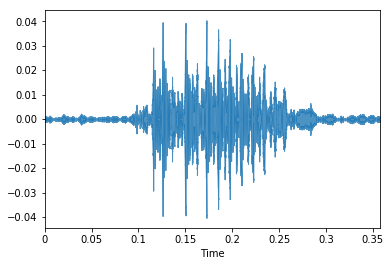

In [223]:
print(chars_values[0])
librosa.display.waveplot(chars_values[0], fs, alpha=0.8)
ipd.Audio(chars_values[0], rate=fs)

[0.00048828 0.0007019  0.00036621 ... 0.00033569 0.00054932 0.00036621]


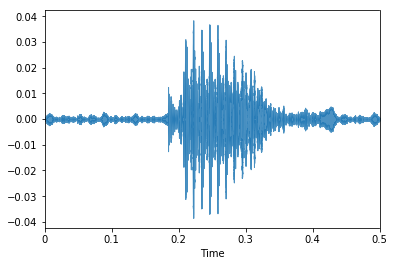

In [224]:
print(chars_values[1])
librosa.display.waveplot(chars_values[1], fs, alpha=0.8)
ipd.Audio(chars_values[1], rate=fs)

[-3.6621094e-04 -7.6293945e-04 -6.4086914e-04 ... -2.7465820e-04
 -3.0517578e-05 -3.3569336e-04]


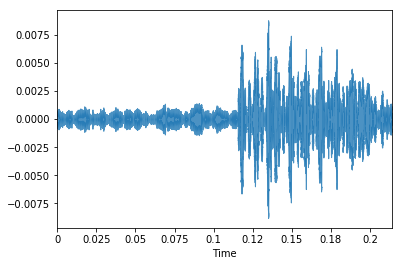

In [225]:
print(chars_values[2])
librosa.display.waveplot(chars_values[2], fs, alpha=0.8)
ipd.Audio(chars_values[2], rate=fs)

[ 2.7465820e-04  4.8828125e-04  3.0517578e-05 ... -6.7138672e-04
 -7.6293945e-04 -2.4414062e-04]


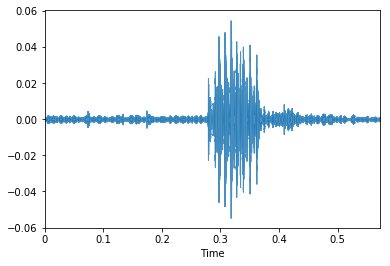

In [226]:
print(chars_values[3])
librosa.display.waveplot(chars_values[3], fs, alpha=0.8)
ipd.Audio(chars_values[3], rate=fs)